### Pregunta 1

#### a)


In [2]:
import urllib
import pandas as pd

'''
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data1.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data1.csv")
'''
#comentado porque ya guardé los csv una vez

train_df = pd.DataFrame.from_csv("train_data1.csv",header=0,index_col=0)
test_df = pd.DataFrame.from_csv("test_data1.csv",header=0,index_col=0)
train_df.tail()
#test_df.tail()


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
524,7,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
525,8,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
526,9,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
527,10,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304
528,11,-4.261,1.827,-0.482,-0.194,0.731,0.354,-0.478,0.050,-0.112,0.321


Se descargan los archivos csv y se cargan en dataframes. El set de entrenamiento tiene 528 registros y el de test tiene 462. 

#### b)

In [21]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

#### c) PCA

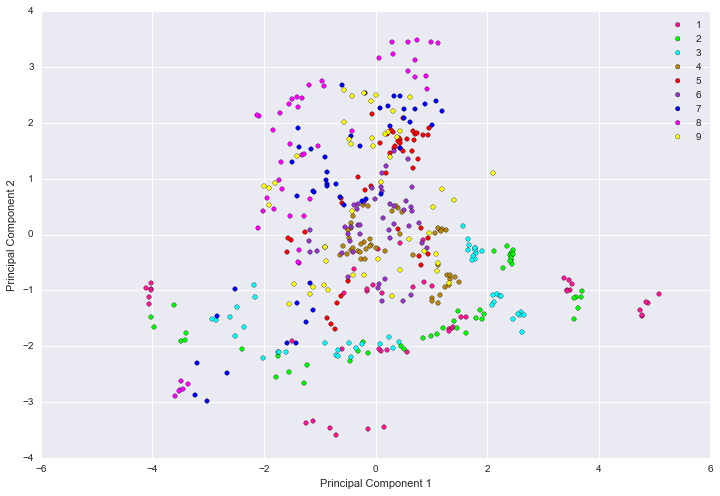

In [67]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
#cmap = plt.cm.get_cmap('jet')
colores = ['deeppink', 'lime', 'aqua', 'darkgoldenrod', 'r', 'darkorchid', 'b', 'magenta','yellow','lightcyan']
cmap = colors.ListedColormap(colores)
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
fig = plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

fig.savefig('plots/PCA.png')

#### d) LDA

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
#cmap = plt.cm.get_cmap('jet')
colores = ['deeppink', 'lime', 'aqua', 'darkgoldenrod', 'r', 'darkorchid', 'b', 'magenta','yellow','lightcyan']
cmap = colors.ListedColormap(colores)
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
fig2 = plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab, c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
#plt.show()

fig2.savefig('plots/LDA.png')

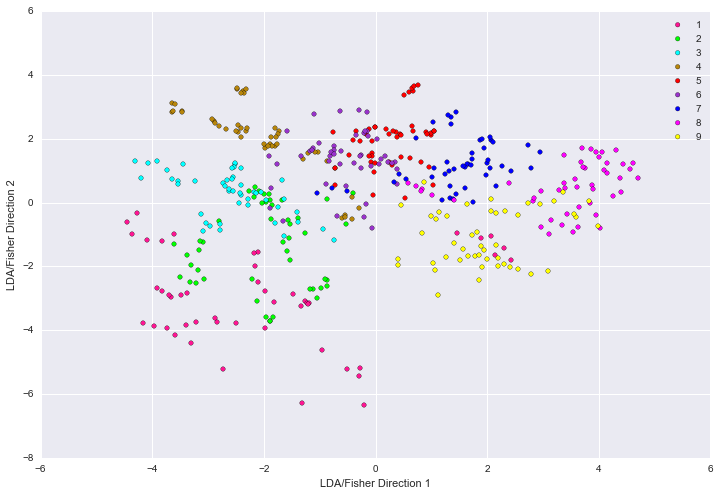

In [93]:
for i in mclasses:
    centro = np.array([np.mean(Xred_lda[y==i,0]), np.mean(Xred_lda[y==i,1])])
    
    

#### e)

En PCA las clases están mucho más mezcladas, la mayoría de ellas tienen puntos cerca del centro y es imposible diferenciarlas. En LDA aunque no se logra diferenciar completamente las clases, están mucho mejor separadas y sólo hay 2 clases (la morada (4) y la roja (5)) que no se pueden aislar parcialmente. 

LDA encuentra un mejor resultado porque considera las etiquetas e intenta maximizar la separación entre las clases.

Para elegir la mejor técnica se podría asignar un área a cada clase (de distintas formas, por ejemplo un círculo centrado en el promedio y que el radio sea el minimo para considerar todos los puntos o un poligono que marque el "outline" uniendo puntos de la clase) y luego elegir el método que minimice el traslape entre las áreas de las clases.

#### f)

In [147]:
from random import randint
def random_classifier(train_labels):
    frecuencia = np.bincount(train_labels.astype(np.int32))
    suma = sum(frecuencia)
    for i in range(1,len(frecuencia)):
        frecuencia[i] = frecuencia[i]+frecuencia[i-1]         
    
    azar = randint(1,suma)
    for i in range(len(frecuencia)):
        if(azar <= frecuencia[i]):
            prediccion = i
            break;
    return prediccion

random_classifier(y)

3

A partir de un set de labels (en este caso el arreglo "y") se calcula la frecuencia de cada clase, se genera un arreglo de frecuencia acumulada y luego se tira un número al azar para determinar a que clase se asigna el nuevo x a priori.

#### g)